In [1]:
# import libraries
import cplex
import matplotlib.pyplot as plt
import numpy as np
import time
start_time = time.time()

In [2]:
# function to import given problem as a string with empty spaces seperating columns and tab stops seperating rows in a matrix

def problem_import(index):
    # Given matrix as a string
    data_set = {}
    data_set[0] = """
    5 4 4 3 1
    5 4 4 6 2
    3 2 3 3 4
    6 4 4 2 4
    3 4 1 5 4
    """
    data_set[1] = """
     54 83 15 71 77 36 53 38 27 87 76 91 14 29 12 77 32 87 68 94
     79  3 11 99 56 70 99 60  5 56  3 61 73 75 47 14 21 86  5 77
     16 89 49 15 89 45 60 23 57 64  7  1 63 41 63 47 26 75 77 40
     66 58 31 68 78 91 13 59 49 85 85  9 39 41 56 40 54 77 51 31
     58 56 20 85 53 35 53 41 69 13 86 72  8 49 47 87 58 18 68 28
    """
    data_set[2] = """
         74 21 58  4 21 28 58 83 31 61 94 44 97 94 66  6 37 22 99 83
 28  3 27 61 34 76 64 87 54 98 76 41 70 43 42 79 88 15 49 72
 89 52 56 13  7 32 32 98 46 60 23 87  7 36 26 85  7 34 36 48
 60 88 26 58 76 98 29 47 79 26 19 48 95 78 77 90 24 10 85 55
 54 66 12 57 70 82 99 84 16 41 23 11 68 58 30  5  5 39 58 31
 92 11 54 97 57 53 65 77 51 36 53 19 54 86 40 56 79 74 24  3
  9  8 88 72 27 22 50  2 49 82 93 96 43 13 60 11 37 91 84 67
  4 18 25 28 95 51 84 18  6 90 69 61 57  5 75  4 38 28  4 80
 25 15 91 49 56 10 62 70 76 99 58 83 84 64 74 14 18 48 96 86
 15 84  8 30 95 79  9 91 76 26 42 66 70 91 67  3 98  4 71 62
    """
    data_set[3] = """
    52 95 42 75 44 57 89 53 84 62 91 14 95 89  4 95  2 97 68 20 33 51 98  8 85 86 73  4 40 98 12 59 44 46  2 41 28 83 28 21 80 71  4 60 34 55 53 96 37 37 63 99 69 70 53 21 10 31 80 18  5 18 17 71 90 93 14 49 52  7 78 57 41 75 98 93 33 75 68 33 60 82 24 99  4 97 24 50 55 91 46 58 17 47 82  6 15 91 74 42
 82 21 79 95 46 23 40 95 87 37 24 24 65 62 19 67 66  6 65 59  2 67 82 90 30 63  5 93 53 85 81 73 34 74 13 78 35 20 16 48 12 11 80  9 24 76 32 35 66 48 16 26 46 66 76 31 36  8 37 21  3 76 67  5 47 72 66 56 95 49 47 26 81 56 76 66 36 53 26 52 29 36 68 21 71 61 71 69 28 86 27 41 86 55 17 62 96 59 53 93
 63 55 59 35 21 59 78 25 30 38 78 79 58 44 38 76 70 72 85  8 10 84 42 67 20 24 75 23 33 60 20 75 83 26 92 29 39 14 74 66 86 10 27  8  7 97 84 56 61  9 94 34 89 62 47 66 76 15 18 54 24 55 96 10 12 96 53 92 77  6 91 14 41 30 85 17 23 60 76 39 85 10 65 15 55 41 28 93 88 27 77 81 19 76 55 67 65  8 18 56
 79 21 93 32  8 45 37 78 26 98 17 25 21 28 68 24 62 89 60 64 38 90 87  1 99 34  9 22 74 14 14 84 75 37 32 29 32 89 12 47 19 97  7 12 43 89 14 33 56 57 22  6 24 55 48 57 78  5 50 83 70 21 71 58 36 50 31 86 29 30 93 49 83 89 44 38 62 45 22 85 39 98 56 68 84 77 67 53 46 24 52 96  2 88 33 27 49 78 82 65
 80 13 64 77 17 78 82  4 72 93 68 25 67 80 43 93 21 33 14 30 59 83 85 85 70 35  2 76 46 72 69 46  3 57 71 77 33 49 59 82 59 70 76 10 65 19 77 86 21 75 96  3 50 57 66 84 98 55 70 32 31 64 11  9 32 58 98 95 25  4 45 60 87 31  1 96 22 95 73 77 30 88 14 22 93 48 10  7 14 91  5 43 30 79 39 34 77 81 11 10
 53 19 99 62 88 93 34 72 42 65 39 79  9 26 72 29 36 48 57 95 93 79 88 77 94 39 74 46 17 30 62 77 43 98 48 14 45 25 98 30 90 92 35 13 75 55 80 67  3 93 54 67 25 77 38 98 96 20 15 36 65 97 27 25 61 24 97 61 75 92 73 21 29  3 96 51 26 44 56 31 64 38 44 46 66 31 48 27 82 51 90 63 85 36 69 67 81 18 81 72
 71 90 59 82 22 88 35 49 78 69 76  2 14  3 22 26 44  1  4 16 55 43 87 35 76 98 78 81 48 25 81 27 84 59 98 14 32 95 30 13 68 19 57 65 13 63 26 96 53 94 27 93 49 63 65 34 10 56 51 97 52 46 16 50 96 85 61 76 30 90 42 88 37 43 88 91 14 63 65 74 71  8 39 95 82 17 38 69 17 24 66 75 52 59  4 73 56 19 39 51
 95 53 54 22 84 54  2 80 84 66 25 16 79 90 51 29 29 90 83 83 19 95 87 12 34 23 44 30 82 83 42 56 89 38 96 10  3 53 97 11 65 47 76 22 17 14 11 69 91 53  3 80 78 32 53 43 85 19 48 49 66 22 37 51 82 59 88 77 19 32 52  9 96 23 64 22 37  3 52 44 11 21 85  6 40 68 30 35 58 31 11 11  6 59 64 65 23 80 75 63
 92 62 11 83 87 66 98 42 23 45 52  6  3 64 55 97 83 42 81 92 68 46 56 88 50 13 23 13 49 18 50 94 71 64 31 21  2 63 58 36 64 52  8 94 51 36 82 30 17 21 80 38 55 34 85 44 47 66 19 66 61 60 98 82 79 71 28 74 27 33 13  9 12 51 16 49 83 48 13 78 96 77 68 88 77 76 73 92 72 87 66 98 40 31 75 45 98 90  4 23
 61 86 16 42 14 92 67 77 46 41 78  3 72 95 53 59 34 66 42 63 27 92  8 65 34  6 42 39  2  7 85 32 14 74 59 95 48 37 59  4 42 93 32 30 16 95 58 12 95 21 74 38  4 31 62 39 97 57  9 54 13 47  6 70 19 97 41  1 57 60 62 14 90 76 12 89 37 35 91 69 55 48 56 84 22 51 43 50 62 61 10 87 99 40 91 64 62 53 33 16
    """
    # Split the matrix into rows
    rows = data_set[index].strip().split("\n")
    # Convert each row to a list of integers
    matrix = [list(map(int, row.split())) for row in rows]

    # Convert the matrix to a list of tuples
    proc_times = [list(row) for row in matrix]
    # Split the matrix into columns by transposing it
    columns = zip(*[map(int, col.split()) for col in data_set[index].strip().split("\n")])

    # Convert the columns to a list of tuples
    proc_times = [tuple(col) for col in columns]
    return proc_times

needed variables:
decision variable:
x_j_k / equals 1 if job j is the kth job in the sequence
auxiliary variables:
I_i_k / idle time on machine i between jobs k and k+1
W_i_k / waiting time of job k in between machines i and i+1

input:
p_i_j / processing time of job j on machine i

In [3]:
#functions to declare variables in cplex

def define_decision_variables():
    decision_variables = []
    # Define the decision variables
    for j in range(num_jobs):
        for k in range(num_jobs):
            # name the decision variables
            var_name = f'x_{j+1}_{k+1}'
            decision_variables.append(var_name)
            problem.variables.add(names=[var_name], lb=[0], ub=[1], types=['B'])
    return decision_variables

def define_auxiliary_variables():
    auxiliary_variables = []
    for i in range(num_machines):
        for k in range(num_jobs-1):
            var_name = f'I_{i+1}_{k+1}'
            auxiliary_variables.append(var_name)
            problem.variables.add(names=[var_name], lb=[0], types=['C'])
    for i in range(num_machines-1):
        for k in range(num_jobs):
            var_name = f'W_{i + 1}_{k + 1}'
            auxiliary_variables.append(var_name)
            problem.variables.add(names=[var_name], lb=[0], types=['C'])
    return auxiliary_variables

In [4]:
# function to print declared variables in console

def print_variable_names():
    # Print variable names
    print("Variable Names:")
    for var in problem.variables.get_names():
        print(var)

In [5]:
# function to add constraints related to permutation flow shop to the cplex model

# add linear constraints
def add_lin_constraints():
    # [[['x_1_1', 'x_2_1', 'x_3_1'], [1,1,1]]] this is how lin_expr should look
    # add first row of constraints
    for k in range(num_jobs):
        constraint_expr = []
        helper = []
        x_j_k = []
        for j in range(num_jobs):
            # name the decision variables
            x_j_k.append(f'x_{j + 1}_{k + 1}')
            helper.append(1)
        constraint_expr.append([x_j_k, helper])
        problem.linear_constraints.add(
            senses=['E'],
            lin_expr=constraint_expr,
            rhs=[1.0],
            names=[f'constraint 1_{k}']
        )


    # add second row of constraints
    for j in range(num_jobs):
        constraint_expr = []
        helper = []
        x_j_k = []
        for k in range(num_jobs):
            # name the decision variables
            x_j_k.append(f'x_{j + 1}_{k + 1}')
            helper.append(1)
        constraint_expr.append([x_j_k, helper])
        problem.linear_constraints.add(
            senses=['E'],
            lin_expr=constraint_expr,
            rhs=[1],
            names=[f'constraint 2_{k}']
        )

    # third row of constraints, unfinished
    for k in range(num_jobs-1):
        for i in range(num_machines-1):
            variable = []
            coef = []
            lin_expr = []
            variable.append(f'I_{i + 1}_{k + 1}')
            coef.append(1)
            for j in range(num_jobs):
                variable.append(f'x_{j + 1}_{k + 2}')
                coef.append(processing_times[j][i])
            variable.append(f'W_{i + 1}_{k + 2}')
            coef.append(1)
            variable.append(f'W_{i + 1}_{k + 1}')
            coef.append(-1)
            # here put sum of x_j_k, p_i_plus_j
            for j in range(num_jobs):
                variable.append(f'x_{j + 1}_{k + 1}')
                coef.append(-processing_times[j][i+1])
            variable.append(f'I_{i + 2}_{k + 1}')
            coef.append(-1)
            lin_expr.append([variable, coef])
            problem.linear_constraints.add(
                senses=['E'],
                lin_expr=lin_expr,
                rhs=[0],
                names=[f'constraint 3_{k}_{i}']
            )


    print('starting fourth row of constraints')
    # fourth row of constraints
    for i in range(num_machines-1):
        lin_expr = []
        variable = []
        coef = []
        variable.append(f'W_{i + 1}_1')
        coef.append(1)
        lin_expr.append([variable, coef])
        problem.linear_constraints.add(
            senses=['E'],
            lin_expr=lin_expr,
            rhs=[0],
            names=[f'constraint 4_{i}']
        )

    # fifth row of constraints
    for k in range(num_jobs - 1):
        var = []
        coef = []
        lin_expr = []
        var.append(f'I_1_{k+1}')
        coef.append(1)
        lin_expr.append([var, coef])
        problem.linear_constraints.add(
            senses=['E'],
            lin_expr=lin_expr,
            rhs=[0],
            names=[f'constraint 5_{k}']
        )

In [6]:
# function to print constraints

def print_constraints():

    print("Constraints:")
    for i in range(problem.linear_constraints.get_num()):
        constraint_name = problem.linear_constraints.get_names(i)
        print(f"Constraint {constraint_name}:")
        print("  Linear Expression:")
        for var, coef in problem.linear_constraints.get_rows(i):
            print(f"    {coef} * {var}")
        sense = problem.linear_constraints.get_senses(i)
        print(f"  Sense: {'>=' if sense == 'G' else '<='}")
        rhs = problem.linear_constraints.get_rhs(i)
        print(f"  RHS: {rhs}")

In [7]:
# function to set objective function to minimize makespan of the problem

def set_objective():
    # describe objective function
    # Define the objective function: minimize the total completion time
    list_x_j_1 = []
    list_p_i_j = []
    objective_expression = []
    for j in range(num_jobs):
        list_x_j_1 = f'x_{j + 1}_1'
        p_i_j = 0
        for i in range(num_machines - 1):
            p_i_j = p_i_j + processing_times[j][i]
        objective_expression.append((list_x_j_1, p_i_j))
    for j in range(num_jobs - 1):
        list_I_m_j = f'I_{num_machines}_{j + 1}'
        objective_expression.append((list_I_m_j, 1))
    print("the goal is to minimize", objective_expression)
    problem.objective.set_linear(objective_expression)
    # minimize objective
    problem.objective.set_sense(problem.objective.sense.minimize)

In [8]:
# function to plot the solution in a Gantt chart

def gantt_plotting(p_i_j, x_i_j, I_i_k, W_i_k):
    # Example job data (replace with your actual data)
    color_palette = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black',
                     'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse',
                     'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan',
                     'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen',
                     'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue',
                     'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue',
                     'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia',
                     'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew',
                     'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen',
                     'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray',
                     'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue',
                     'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen',
                     'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple',
                     'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred',
                     'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive',
                     'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
                     'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple',
                     'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown',
                     'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey',
                     'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet',
                     'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']
    job_order = []

    # Create a dictionary from the list
    matrix_dict = {item[0]: item[1] for item in x_i_j}

    # Convert the dictionary to a numpy matrix
    matrix_x_i_j = np.array(list(matrix_dict.values()))

    # Reshape the matrix to a 5x5 shape (assuming it's a square matrix)
    matrix_x_i_j = matrix_x_i_j.reshape(num_jobs, num_jobs)
    print(matrix_x_i_j)
    # Print the resulting numpy matrix
    job_order=np.argmax(matrix_x_i_j, 0)
    print(job_order)
    # sort processing time
    sorted_p_i_j = []
    for i in range(num_jobs):
        helper = job_order[i]+1
        sorted_p_i_j.append(p_i_j[helper-1])
    dict_p_i_j = {}
    for i in range(num_jobs):
        for j in range(num_machines):
            dict_p_i_j[f"p_{j+1}_{i+1}"] = sorted_p_i_j[i][j]
    dict_I_i_k = {}
    counter = 0
    for k in range(num_machines):
        for i in range(num_jobs-1):
            dict_I_i_k[f"I_{k + 1}_{i + 1}"] = I_i_k[counter][1]
            counter += 1
    counter = 0
    dict_W_i_k = {}
    for k in range(num_machines-1):
        for i in range(num_jobs):
            dict_W_i_k[f"W_{k + 1}_{i + 1}"] = W_i_k[counter][1]
            counter += 1
    start_times=[]
    job_start=0
    for j in range(num_jobs):
        value = 0
        if j != 0:
            job_start += dict_p_i_j[f"p_1_{j}"]
        for i in range(num_machines):
            if i == 0:
                value = job_start
            elif j == 0:
                value += dict_p_i_j[f"p_{i}_{j + 1}"] + dict_W_i_k[f"W_{i}_{j + 1}"]
            else:
                value += dict_p_i_j[f"p_{i}_{j+1}"] + dict_W_i_k[f"W_{i}_{j+1}"]
            start_times.append(value)
            total_time = start_times[-1] + dict_p_i_j[f"p_{i+1}_{j+1}"]
    print(f'total makespan is {total_time}')
    job_names = []
    durations = []
    colors = []
    for i in range(num_jobs):
        for k in range(num_machines):
            job_names.append(f'machine {k+1}')
            durations.append(sorted_p_i_j[i][k])
            colors.append(color_palette[i+8])


    # Create a Gantt chart
    plt.figure(figsize=(10, 6))
    # Plot bars for each job
    for i, job_name in enumerate(job_names):
        plt.barh(job_name, durations[i], left=start_times[i], height=0.6, color=colors[i], alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Job')
    plt.title('Flow Shop Scheduling Gantt Chart')
    plt.grid(axis='x')
    plt.show()

In [9]:
# helper functions to split a list

def split_list(a_list, lengths):
    result = []
    start = 0
    for length in lengths:
        end = start + length
        result.append(a_list[start:end])
        start = end
    return result

In [10]:
# main part of the program to access the correct functions at the correct time.

# Define the data for the flow shop scheduling problem
processing_times = problem_import(0) #value 0 for very small, 1 for medium, 2 for large
#calc number of jobs and machines based on given processing time matrix
num_jobs = len(processing_times)
num_machines = len(processing_times[0])
print("The given problem has", num_jobs, "jobs and", num_machines, "machines.")
# create problem in cplex
problem = cplex.Cplex()
problem.parameters.lpmethod.set(problem.parameters.lpmethod.values.auto)  # Use automatic algorithm selection
decision_variables = define_decision_variables()
auxiliary_variables = define_auxiliary_variables()
add_lin_constraints()

# set objective
set_objective()
# Solve the problem
problem.solve()

# Print the solution
print("Solution status:", problem.solution.get_status())
print("Optimal objective value:", problem.solution.get_objective_value())
# get solution as list of different kind of variables x, I, W
var_solution_values=[]
for i in problem.variables.get_names():
    var_solution_values.append([i, problem.solution.get_values(i)])
custom_lengths = [(num_jobs)*num_jobs, num_machines*(num_jobs-1), (num_machines-1)*num_jobs]  # Example: Split into sublists of lengths 4, 3, and 5
smaller_list = split_list(var_solution_values, custom_lengths)
x_i_j = smaller_list[0]
I_i_k = smaller_list[1]
W_i_k = smaller_list[2]

The given problem has 5 jobs and 5 machines.
starting fourth row of constraints
the goal is to minimize [('x_1_1', 19), ('x_2_1', 14), ('x_3_1', 15), ('x_4_1', 14), ('x_5_1', 11), ('I_5_1', 1), ('I_5_2', 1), ('I_5_3', 1), ('I_5_4', 1)]
Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 8 rows and 8 columns.
MIP Presolve modified 160 coefficients.
Reduced MIP has 26 rows, 57 columns, and 186 nonzeros.
Reduced MIP has 25 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.15 ticks)
Found incumbent of value 20.000000 after 0.01 sec. (0.21 ticks)
Probing time = 0.00 sec. (0.03 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 26 rows, 57 columns, and 186 nonzeros.
Reduced MIP has 25 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.10 ticks)
Probing time = 0.00 sec. (0.03 ticks)
Clique table members: 10.
MIP emphasi

[[-0. -0.  1. -0. -0.]
 [-0.  0.  0.  1. -0.]
 [-0.  0. -0. -0.  1.]
 [ 0.  1. -0.  0. -0.]
 [ 1. -0. -0. -0. -0.]]
[4 3 0 1 2]
total makespan is 33.0


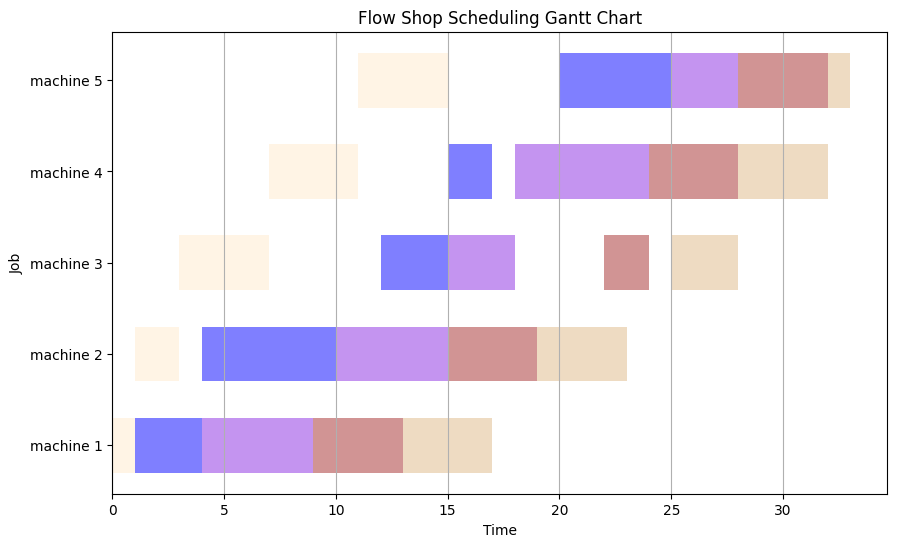

In [11]:
gantt_plotting(processing_times, x_i_j, I_i_k, W_i_k)

In [12]:
# Print the variables
print("Variables:")
num_vars = problem.variables.get_num()
for i in range(num_vars):
    var_name = problem.variables.get_names(i)
    var_lb = problem.variables.get_lower_bounds(i)
    var_ub = problem.variables.get_upper_bounds(i)
    var_type = problem.variables.get_types(i)
    print("Variable {}: Name={}, Lower Bound={}, Upper Bound={}, Type={}".format(i, var_name, var_lb, var_ub,
                                                                                 var_type))

Variables:
Variable 0: Name=x_1_1, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 1: Name=x_1_2, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 2: Name=x_1_3, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 3: Name=x_1_4, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 4: Name=x_1_5, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 5: Name=x_2_1, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 6: Name=x_2_2, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 7: Name=x_2_3, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 8: Name=x_2_4, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 9: Name=x_2_5, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 10: Name=x_3_1, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 11: Name=x_3_2, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 12: Name=x_3_3, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 13: Name=x_3_4, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 14: Name=x_3_5, Lower Bound=0.0, Upper Bound=1.0, Type=B
Variable 

In [13]:
print("Constraints:")
for i, constraint in enumerate(problem.linear_constraints.get_rows()):
    print("Constraint {}: {}".format(i, constraint))

variable_indexes = []

for i, constraint in enumerate(problem.linear_constraints.get_rows()):
    indexes = constraint.ind
    variable_indexes.extend(indexes)

# Remove duplicates if needed
variable_indexes = list(set(variable_indexes))

# Get variable values
solution_values = problem.solution.get_values()

# Print the variables and their values
for i, value in enumerate(solution_values):
    var_name = problem.variables.get_names(i)
    var_value = value

# Print the constraints in equation form with variable values
print("\nConstraints:")
for i, constraint in enumerate(problem.linear_constraints.get_rows()):
    indices = constraint.ind
    coefficients = constraint.val
    constant = problem.linear_constraints.get_rhs(i)  # Access the RHS of the constraint
    constraint_eq = ""
    for index, coefficient in zip(indices, coefficients):
        var_name = problem.variables.get_names(index)
        var_value = solution_values[index]  # Get the value of the variable in the solution
        constraint_eq += " {}*{}({}) +".format(coefficient, var_name, var_value)
    constraint_eq = constraint_eq[:-1]  # Remove the trailing '+'
    print("Constraint {}: {} = {}".format(i, constraint_eq, constant))

Constraints:
Constraint 0: SparsePair(ind = [0, 5, 10, 15, 20], val = [1.0, 1.0, 1.0, 1.0, 1.0])
Constraint 1: SparsePair(ind = [1, 6, 11, 16, 21], val = [1.0, 1.0, 1.0, 1.0, 1.0])
Constraint 2: SparsePair(ind = [2, 7, 12, 17, 22], val = [1.0, 1.0, 1.0, 1.0, 1.0])
Constraint 3: SparsePair(ind = [3, 8, 13, 18, 23], val = [1.0, 1.0, 1.0, 1.0, 1.0])
Constraint 4: SparsePair(ind = [4, 9, 14, 19, 24], val = [1.0, 1.0, 1.0, 1.0, 1.0])
Constraint 5: SparsePair(ind = [0, 1, 2, 3, 4], val = [1.0, 1.0, 1.0, 1.0, 1.0])
Constraint 6: SparsePair(ind = [5, 6, 7, 8, 9], val = [1.0, 1.0, 1.0, 1.0, 1.0])
Constraint 7: SparsePair(ind = [10, 11, 12, 13, 14], val = [1.0, 1.0, 1.0, 1.0, 1.0])
Constraint 8: SparsePair(ind = [15, 16, 17, 18, 19], val = [1.0, 1.0, 1.0, 1.0, 1.0])
Constraint 9: SparsePair(ind = [20, 21, 22, 23, 24], val = [1.0, 1.0, 1.0, 1.0, 1.0])
Constraint 10: SparsePair(ind = [0, 1, 5, 6, 10, 11, 15, 16, 20, 21, 25, 29, 45, 46], val = [-5.0, 5.0, -4.0, 4.0, -4.0, 4.0, -6.0, 3.0, -2.0, 1.0,

In [14]:
# Print the constraints in equation form with variable values
print("\nConstraints: with 0 times variable removed from equation")
for i, constraint in enumerate(problem.linear_constraints.get_rows()):
    indices = constraint.ind
    coefficients = constraint.val
    constant = problem.linear_constraints.get_rhs(i)  # Access the RHS of the constraint
    constraint_eq = ""
    for index, coefficient in zip(indices, coefficients):
        var_name = problem.variables.get_names(index)
        var_value = solution_values[index]  # Get the value of the variable in the solution
        if var_value != 0:  # Check if the variable value is not zero
            constraint_eq += " {}*{}({}) +".format(coefficient, var_name, var_value)
    if constraint_eq:  # Check if the constraint equation is not empty
        constraint_eq = constraint_eq[:-1]  # Remove the trailing '+'
        print("Constraint {}: {} = {}".format(i, constraint_eq, constant))


Constraints: with 0 times variable removed from equation
Constraint 0:  1.0*x_5_1(1.0)  = 1.0
Constraint 1:  1.0*x_4_2(1.0)  = 1.0
Constraint 2:  1.0*x_1_3(1.0)  = 1.0
Constraint 3:  1.0*x_2_4(1.0)  = 1.0
Constraint 4:  1.0*x_3_5(1.0)  = 1.0
Constraint 5:  1.0*x_1_3(1.0)  = 1.0
Constraint 6:  1.0*x_2_4(1.0)  = 1.0
Constraint 7:  1.0*x_3_5(1.0)  = 1.0
Constraint 8:  1.0*x_4_2(1.0)  = 1.0
Constraint 9:  1.0*x_5_1(1.0)  = 1.0
Constraint 10:  3.0*x_4_2(1.0) + -2.0*x_5_1(1.0) + -1.0*I_2_1(1.0)  = 0.0
Constraint 11:  6.0*x_4_2(1.0) + -4.0*x_5_1(1.0) + 1.0*I_2_1(1.0) + -1.0*I_3_1(5.0) + 1.0*W_2_2(2.0)  = 0.0
Constraint 12:  3.0*x_4_2(1.0) + -4.0*x_5_1(1.0) + 1.0*I_3_1(5.0) + -1.0*I_4_1(4.0)  = 0.0
Constraint 13:  2.0*x_4_2(1.0) + -4.0*x_5_1(1.0) + 1.0*I_4_1(4.0) + -1.0*I_5_1(5.0) + 1.0*W_4_2(3.0)  = 0.0
Constraint 14:  5.0*x_1_3(1.0) + -6.0*x_4_2(1.0) + 1.0*W_1_3(1.0)  = 0.0
Constraint 15:  5.0*x_1_3(1.0) + -3.0*x_4_2(1.0) + -1.0*W_2_2(2.0)  = 0.0
Constraint 16:  3.0*x_1_3(1.0) + -2.0*x_4_2(

In [15]:
# Record the end time
end_time = time.time()
total_time = end_time - start_time
print(f"Total time to run all cells: {total_time:.2f} seconds")

Total time to run all cells: 0.63 seconds
